# Laboratorio 2

- Brian Carrillo
- Carlos López
- Josué Morales
- Marco Ramírez

#### Ejercicio 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def newton_multidimensional(F, DF, x0, maxIter, tol):
    x = x0
    approximations = [x0]
    eigenvalue = 0

    for i in range(maxIter):
        Fx = F(x)
        DFx = DF(x)
        delta_x = np.linalg.inv(DFx) @ -Fx
        x = x + delta_x
        approximations.append(x)

        if np.linalg.norm(delta_x, ord=2) < tol:
            eigenvalue = np.linalg.eigvals(DFx)
            break

    return approximations, x, eigenvalue

# Definir una función ejemplo F y su derivada DF
def F(variables):
    x, y, z = variables

    return np.array([
        3*x - np.cos(y*z) - 1/2,
        x**2 - 81*(y + 0.1)**2 + np.sin(z) + 1.06,
        np.exp(-x*y) + 20*z + (10*np.pi - 3)/3
    ])

def DF(variables):
    x, y, z = variables

    return np.array([
        [3, z*np.sin(y*z), y*np.sin(y*z)],
        [2*x, -162*(y + 0.1), np.cos(z)],
        [-y*np.exp(-x*y), -x*np.exp(-x*y), 20]
    ])

In [ ]:
x0 = np.array([0.1, 0.1, 0.1])
maxIter = 100
tol = 1e-7

approximations, zero, _ = newton_multidimensional(F, DF, x0, maxIter, tol)
print("Aproximaciones realizadas:\n")
for item in approximations:
  print(item)
print("Cero encontrado en:", zero)

Aproximaciones realizadas:

[0.1 0.1 0.1]
[ 0.50021734  0.01948961 -0.52151864]
[ 0.50001427  0.00159199 -0.52355718]
[ 5.00000114e-01  1.24976608e-05 -5.23598449e-01]
[ 5.00000000e-01  7.82391905e-10 -5.23598776e-01]
[ 5.00000000e-01  1.01414826e-17 -5.23598776e-01]
Cero encontrado en: [ 5.00000000e-01  1.01414826e-17 -5.23598776e-01]


#### Ejercicio 2

Inciso a

In [ ]:
# Definir una función ejemplo F y su derivada DF
def F(variables):
    x, y = variables

    return np.array([
        3*x**2 - y**2,
        3*x*y**2 - x**3 - 1
    ])

def DF(variables):
    x, y = variables

    return np.array([
        [6*x, -2*y],
        [3*y**2 - 3*x**2, 6*x*y]
    ])

def find_zeros(F, DF, initial_points, maxIter=100, tol=1e-7):
    zeros = []
    for x0 in initial_points:
        _, zero, _ = newton_multidimensional(F, DF, x0, maxIter, tol)
        if all(np.linalg.norm(zero - z, ord=2) >= tol for z in zeros):
            zeros.append(zero)
    return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [
    np.array([0.5, 0.5]),
    np.array([100, 100]),
    np.array([-0.5, 0.5]),
    np.array([-100, 100]),
    np.array([-0.5, -0.5]),
    np.array([-100, -100]),
    np.array([0.5, -0.5]),
    np.array([100, -100]),
    np.array([-0.5 - 0.5j, 0.5 + 0.5j], dtype=np.complex128),
    np.array([-0.5 - 0.5j, -0.5 - 0.5j], dtype=np.complex128),
    np.array([-0.5 + 0.5j, 0.5 - 0.5j], dtype=np.complex128),
    np.array([-0.5 + 0.5j, -0.5 + 0.5j], dtype=np.complex128),
]

# Encontrar todos los ceros
zeros = find_zeros(F, DF, initial_points)
print("Ceros encontrados:")
for zero in zeros:
    print(zero)

Ceros encontrados:
[0.5       0.8660254]
[ 0.5       -0.8660254]
[-0.25     -0.4330127j  0.4330127+0.75j     ]
[-0.25     -0.4330127j -0.4330127-0.75j     ]
[-0.25     +0.4330127j  0.4330127-0.75j     ]
[-0.25     +0.4330127j -0.4330127+0.75j     ]


Inciso b

In [ ]:
# Definir una función ejemplo F y su derivada DF
def F(variables):
    x, y, z = variables

    return np.array([
        12*x -3*y**2 - 4*z - 7.17,
        x + 10*y - z - 11.54,
        y**3 - 7*z**3 - 7.631
    ])

def DF(variables):
    x, y, z = variables

    return np.array([
        [12, -6*y, -4],
        [1, 10, -1],
        [0, 3*y**2, -21*z**2]
    ])

def find_zeros(F, DF, initial_points, maxIter=100, tol=1e-7):
    zeros = []
    for x0 in initial_points:
        _, zero,_ = newton_multidimensional(F, DF, x0, maxIter, tol)
        if all(np.linalg.norm(zero - z, ord=2) >= tol for z in zeros):
            zeros.append(zero)
    return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [
    np.array([0.5, 0.5, 0.5]),
    np.array([100, 100, 100]),
    np.array([-0.5, 0.5, 0.5]),
    np.array([-100, 100, 100]),
    np.array([0.5, -0.5, 0.5]),
    np.array([100, -100, 100]),
    np.array([0.5, 0.5, -0.5]),
    np.array([100, 100, -100]),
    np.array([-0.5, -0.5, 0.5]),
    np.array([-100, -100, 100]),
    np.array([0.5, -0.5, -0.5]),
    np.array([100, -100, -100]),
    np.array([-0.5, 0.5, -0.5]),
    np.array([-100, 100, -100]),
    np.array([-0.5, -0.5, -0.5]),
    np.array([-100, -100, -100]),
    np.array([1 - 0.1j, 1 - 0.1j, 0.5 - 0.5j], dtype=np.complex128),
    np.array([1 + 0.1j, 1 + 0.1j, 0.5 + 0.5j], dtype=np.complex128),
    np.array([100 - 100j, -100 + 1j, 100 - 100j], dtype=np.complex128),
    np.array([100 + 100j, -100 - 1j, 100 + 100j], dtype=np.complex128)
]

# Encontrar todos los ceros
zeros = find_zeros(F, DF, initial_points)
print("Ceros encontrados:")
for zero in zeros:
    print(zero)

Ceros encontrados:
[ 0.52212818  1.00363013 -0.98157054]
[387.86350231 -39.708213   -20.75862767]
[1.06155941-0.30627336j 1.09701177-0.05259935j 0.49167712-0.83226691j]
[1.06155941+0.30627336j 1.09701177+0.05259935j 0.49167712+0.83226691j]
[439.36562535-30.98460973j -41.74472034 +1.1777396j
  10.37842198-19.20721371j]
[439.36562535+30.98460973j -41.74472034 -1.1777396j
  10.37842198+19.20721371j]


#### Ejercicio 3

Inciso i

In [ ]:
# Definir una función ejemplo F y su derivada DF
def F(variables):
    x, y = variables

    return np.array([
        4*x + 2*y + 2*x**2 - 3*y**2,
        4*x - 3*y + 7*x*y
    ])

def DF(variables):
    x, y = variables

    return np.array([
        [4 + 4*x, 2 - 6*y],
        [4 + 7*y, -3 + 7*x]
    ])

def find_zeros(F, DF, initial_points, maxIter=100, tol=1e-7):
    zeros = []
    for x0 in initial_points:
        _, zero, eigenvalue = newton_multidimensional(F, DF, x0, maxIter, tol)
        if all(np.linalg.norm(zero - z, ord=2) >= tol for z in zeros):
            zeros.append([zero, eigenvalue])
    return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [
    np.array([0.1, 0.1]),
    np.array([-1 - 0.j, -1 - 0.j], dtype=np.complex128),
    np.array([0.1 + 0.j, 1 - 0.j], dtype=np.complex128),
    np.array([1 - 0.j, -1 + 0.j], dtype=np.complex128),
]

# Encontrar todos los ceros
zeros = find_zeros(F, DF, initial_points)
print("Ceros encontrados:")
for zero, eigenvalue in zeros:
    print("\nCero:",zero)
    print("Eigenvalue:", eigenvalue)

Ceros encontrados:

Cero: [-4.81261079e-16  1.42768509e-15]
Eigenvalue: [ 5.00000019 -3.99999978]

Cero: [-2.35424307+0.j -0.48342488+0.j]
Eigenvalue: [ -5.20548156+0.j -19.69119221+0.j]

Cero: [0.27888449+0.j 1.06463911+0.j]
Eigenvalue: [2.03386471+6.38395265j 2.03386471-6.38395265j]

Cero: [ 0.93250143+0.j -1.05740471+0.j]
Eigenvalue: [5.62875789+4.8960299j 5.62875789-4.8960299j]


In [ ]:
def graficar_campo_direcciones(F, xmin, xmax, ymin, ymax, xstep, ystep, unitario=False, graficar_flujo=False, punto_flujo=None):
    # Crear rangos y subdivisiones en los ejes x e y
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    # Generar la rejilla de puntos a graficar
    X, Y = np.meshgrid(x, y)

    # Evaluar la función f en cada punto de la rejilla
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    # Si se desea graficar el campo unitario
    if unitario:
        M = np.hypot(U, V)
        U, V = U / M, V / M

    # Graficar el campo vectorial usando quiver
    plt.quiver(X, Y, U, V, color='purple',angles = 'xy')
    plt.title('Campo direccional')
    plt.xlabel('x')
    plt.ylabel('y')

    # Graficar las líneas de flujo si se especifica
    if graficar_flujo and punto_flujo:
        x_seed, y_seed = punto_flujo
        plt.streamplot(X, Y, U, V, color='blue', start_points=np.array([[x_seed, y_seed]]))
    elif graficar_flujo:
        plt.streamplot(X, Y, U, V, color='blue')

    plt.show()


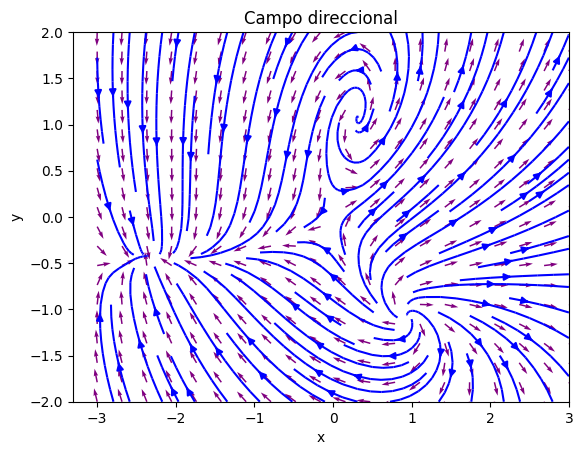

In [ ]:
# Función auxiliar que define el campo vectorial
def F(x, y):
    u = 4*x + 2*y + 2*x**2 - 3*y**2
    v = 4*x - 3*y + 7*x*y
    return u, v

graficar_campo_direcciones(F, xmin=-3, xmax=3, ymin=-2, ymax=2, xstep=20, ystep=20, unitario=True, graficar_flujo=True)

Inciso ii

In [ ]:
# Definir una función ejemplo F y su derivada DF
def F(variables):
    x, y = variables

    return np.array([
        33 - 10*x - 3*y + x**2,
        -18 + 6*x + 2*y -x*y
    ])

def DF(variables):
    x, y = variables

    return np.array([
        [-10 + 2*x, -3],
        [6 - y, 2 - x]
    ])

def find_zeros(F, DF, initial_points, maxIter=100, tol=1e-7):
    zeros = []
    for x0 in initial_points:
        _, zero, eigenvalue = newton_multidimensional(F, DF, x0, maxIter, tol)
        if all(np.linalg.norm(zero - z, ord=2) >= tol for z in zeros):
            zeros.append([zero, eigenvalue])
    return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [
    np.array([0, 0]),
    np.array([10, 10]),
    np.array([0, 10]),
]

# Encontrar todos los ceros
zeros = find_zeros(F, DF, initial_points)
print("Ceros encontrados:")
for zero, eigenvalue in zeros:
    print("\nCero:",zero)
    print("Eigenvalue:", eigenvalue)

Ceros encontrados:

Cero: [4. 3.]
Eigenvalue: [-2.+3.j -2.-3.j]

Cero: [7.60555128 4.92963248]
Eigenvalue: [ 4.90560793 -5.30005666]

Cero: [0.39444872 9.73703418]
Eigenvalue: [-10.16367986   2.55812859]


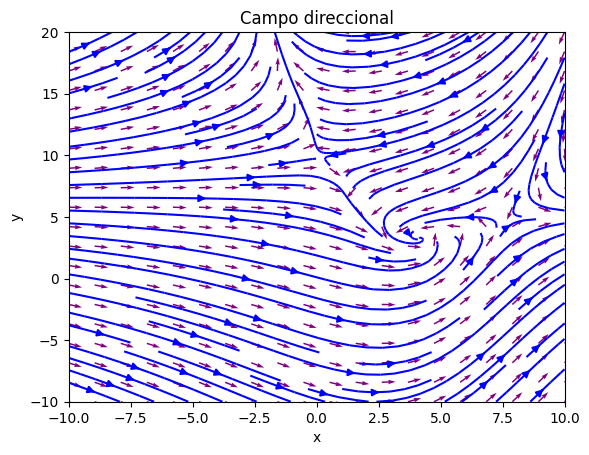

In [ ]:
# Función auxiliar que define el campo vectorial
def F(x, y):
    u = 33 - 10*x - 3*y + x**2
    v = -18 + 6*x + 2*y - x*y
    return u, v

graficar_campo_direcciones(F, xmin=-10, xmax=10, ymin=-10, ymax=20, xstep=20, ystep=20, unitario=True, graficar_flujo=True)

#### Ejercicio 4

### Funciones

In [ ]:
### Referencias:
### Parmida Granfar (2019). Second order Taylor method for solving ODE. https://math.stackexchange.com/questions/3236606/second-order-taylor-method-for-solving-ode
### Imperial College London (n/a). Heun’s method. https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/4_Heuns_method.html

# Define la función para la ecuación diferencial 1
def func1(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Define la primera derivada de la función para la ecuación diferencial 1
def func1_prime(x, y):
    return ((22 / 5) * np.exp(x / 5) - 5)

# Define la función para la ecuación diferencial 2
def func2(x, y):
    return -1*np.sin(x)

# Define la primera derivada de la función para la ecuación diferencial 2
def func2_prime(x, y):
    return -1*np.cos(x)

# Método de Euler
def euler(f, u0, t0, t_max, dt):
    u = u0
    t = t0
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt * f(t, u)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return u_all, t_all

# Método de Heun
def heun(f, u0, t0, t_max, dt):
    u = u0
    t = t0
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt * f(t, u)  # Aproximación de Euler
        u = u + 0.5 * dt * (f(t, u) + f(t + dt, ue))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return u_all, t_all

# Método de Taylor de Segundo Orden
def taylor_second_order(f, f_prime, u0, t0, t_max, dt):
    u = u0
    t = t0
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt * f(t, u) + 0.5 * dt**2 * f_prime(t, u)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return u_all, t_all

### a) dy/dx = 22e^(x/5) -5x -25, y(0) = -3, en el intervalo [0,5]

---



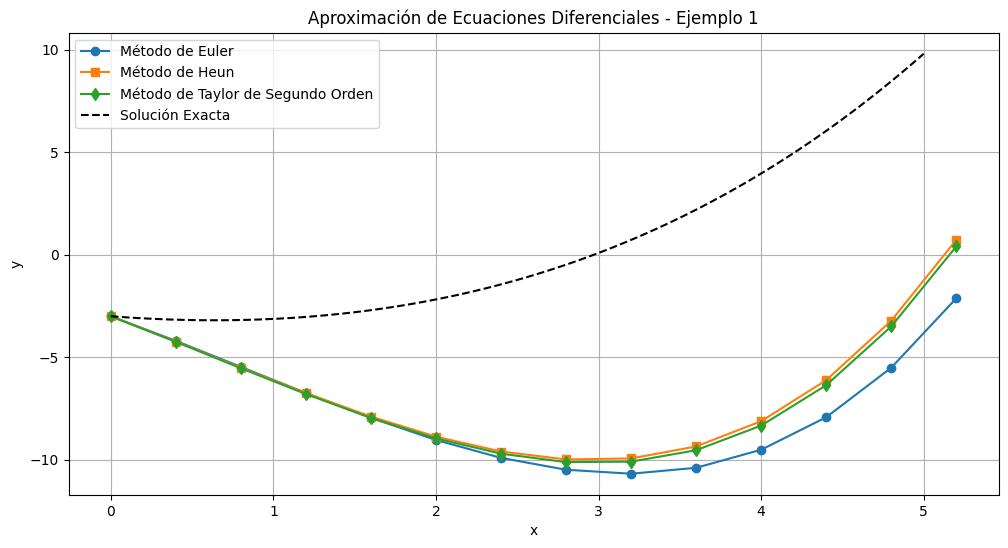

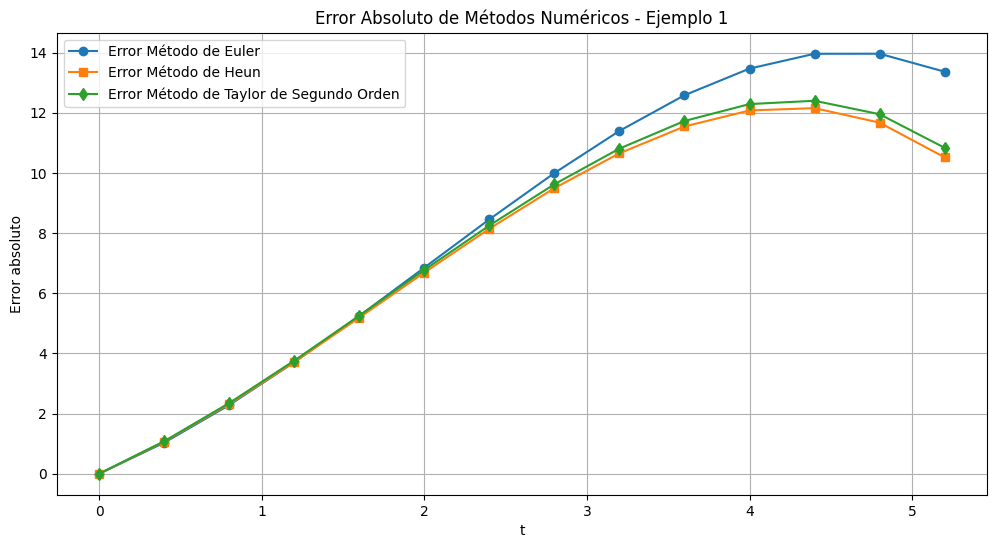

In [ ]:
# Parámetros
x0 = 0
y0 = -3
dt = 0.4
t_max = 5

# Calcula las soluciones para la ecuación diferencial 1
u_all_euler, t_all_euler = euler(func1, y0, x0, t_max, dt)
u_all_heun, t_all_heun = heun(func1, y0, x0, t_max, dt)
u_all_taylor, t_all_taylor = taylor_second_order(func1, func1_prime, y0, x0, t_max, dt)

# Crear gráficos para la ecuación diferencial 1
plt.figure(figsize=(12, 6))

# Gráfico para el método de Euler
plt.plot(t_all_euler, u_all_euler, 'o-', label='Método de Euler')

# Gráfico para el método de Heun
plt.plot(t_all_heun, u_all_heun, 's-', label='Método de Heun')

# Gráfico para el método de Taylor de Segundo Orden
plt.plot(t_all_taylor, u_all_taylor, 'd-', label='Método de Taylor de Segundo Orden')

# Comparación con la solución exacta
def exact_solution(x):
    # Solución exacta placeholder, ajusta si conoces la solución exacta
    return 22 * np.exp(x / 5) - 5 * x - 25

x_exact = np.linspace(x0, t_max, 100)
y_exact = [exact_solution(xi) for xi in x_exact]
plt.plot(x_exact, y_exact, 'k--', label='Solución Exacta')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de Ecuaciones Diferenciales - Ejemplo 1')
plt.legend()
plt.grid(True)
plt.show()

y_exact_euler = [exact_solution(t) for t in t_all_euler]
y_exact_heun = [exact_solution(t) for t in t_all_heun]
y_exact_taylor = [exact_solution(t) for t in t_all_taylor]

error_euler = np.abs(np.array(u_all_euler) - np.array(y_exact_euler))
error_heun = np.abs(np.array(u_all_heun) - np.array(y_exact_heun))
error_taylor = np.abs(np.array(u_all_taylor) - np.array(y_exact_taylor))

# Gráfico del error
plt.figure(figsize=(12, 6))

# Gráfico del error para el método de Euler
plt.plot(t_all_euler, error_euler, 'o-', label='Error Método de Euler')

# Gráfico del error para el método de Heun
plt.plot(t_all_heun, error_heun, 's-', label='Error Método de Heun')

# Gráfico del error para el método de Taylor de Segundo Orden
plt.plot(t_all_taylor, error_taylor, 'd-', label='Error Método de Taylor de Segundo Orden')

plt.xlabel('t')
plt.ylabel('Error absoluto')
plt.title('Error Absoluto de Métodos Numéricos - Ejemplo 1')
plt.legend()
plt.grid(True)
plt.show()


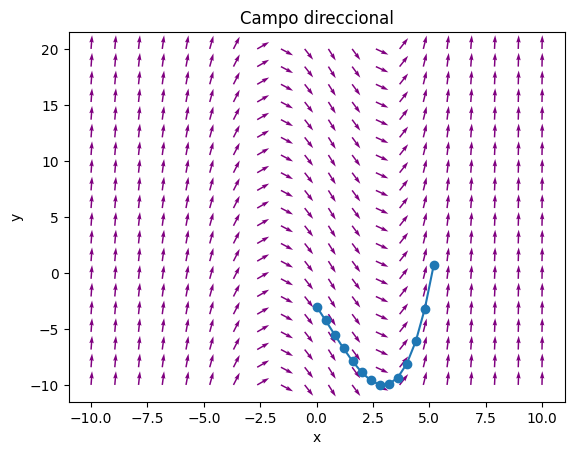

In [ ]:
# Función auxiliar que define el campo vectorial
def F(x, y):
    u = 1
    v = 22 * np.exp(x / 5) - 5 * x - 25
    return u, v

def graficar_campo_direcciones(F, xmin, xmax, ymin, ymax, xstep, ystep, unitario=False, graficar_flujo=False, punto_flujo=None):
    # Crear rangos y subdivisiones en los ejes x e y
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    # Generar la rejilla de puntos a graficar
    X, Y = np.meshgrid(x, y)

    # Evaluar la función f en cada punto de la rejilla
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    # Si se desea graficar el campo unitario
    if unitario:
        M = np.hypot(U, V)
        U, V = U / M, V / M

    # Graficar el campo vectorial usando quiver
    plt.quiver(X, Y, U, V, color='purple',angles = 'xy')
    plt.title('Campo direccional')
    plt.xlabel('x')
    plt.ylabel('y')

    # Graficar las líneas de flujo si se especifica
    if graficar_flujo and punto_flujo:
        x_seed, y_seed = punto_flujo
        plt.streamplot(X, Y, U, V, color='blue', start_points=np.array([[x_seed, y_seed]]))
    elif graficar_flujo:
        plt.streamplot(X, Y, U, V, color='blue')

    # Gráfico para el método de Heun
    plt.plot(t_all_heun, u_all_heun, 'o-', label='Método de Heun')

    plt.show()

graficar_campo_direcciones(F, xmin=-10, xmax=10, ymin=-10, ymax=20, xstep=20, ystep=20, unitario=True, graficar_flujo=False)


### b) dy/dt = -sin t, y(0) = 1, en el intervalo [0,6pi]

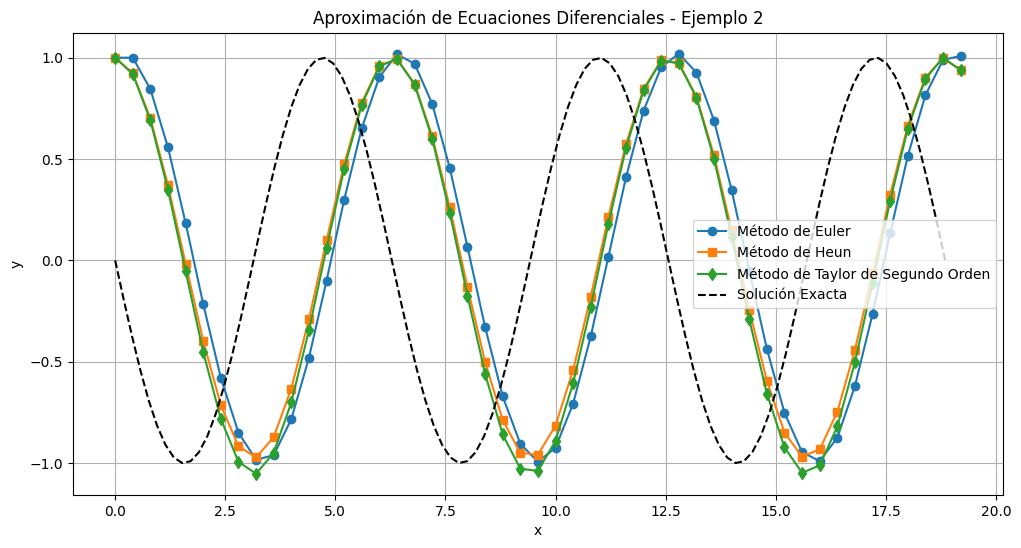

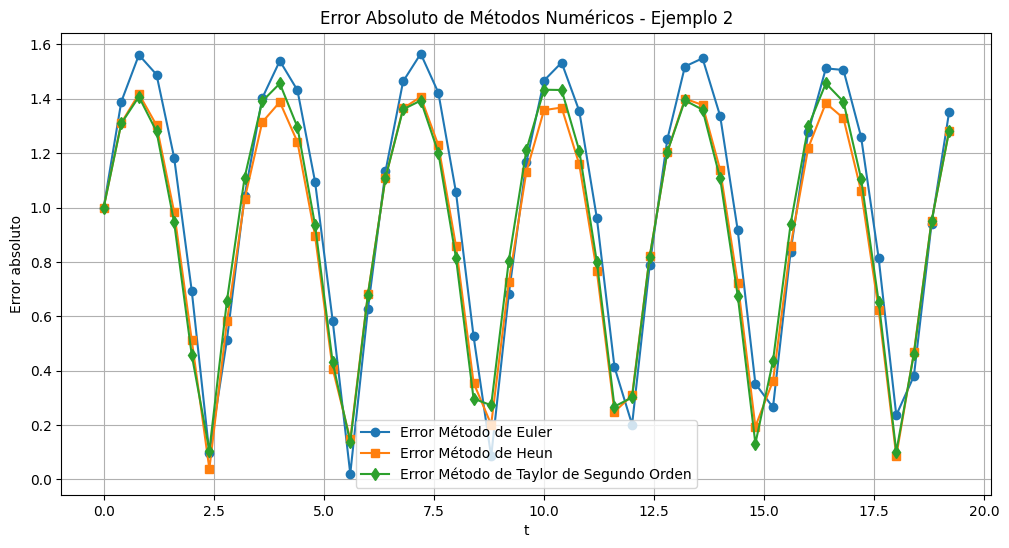

In [ ]:
t0 = 0
y0 = 1
dt = 0.4
t_max = 6 * np.pi

# Calcula las soluciones para la ecuación diferencial 1
u_all_euler, t_all_euler = euler(func2, y0, x0, t_max, dt)
u_all_heun, t_all_heun = heun(func2, y0, x0, t_max, dt)
u_all_taylor, t_all_taylor = taylor_second_order(func2, func2_prime, y0, x0, t_max, dt)

# Crear gráficos para la ecuación diferencial 1
plt.figure(figsize=(12, 6))

# Gráfico para el método de Euler
plt.plot(t_all_euler, u_all_euler, 'o-', label='Método de Euler')

# Gráfico para el método de Heun
plt.plot(t_all_heun, u_all_heun, 's-', label='Método de Heun')

# Gráfico para el método de Taylor de Segundo Orden
plt.plot(t_all_taylor, u_all_taylor, 'd-', label='Método de Taylor de Segundo Orden')

# Comparación con la solución exacta
def exact_solution(x):
    # Solución exacta placeholder, ajusta si conoces la solución exacta
    return -1*np.sin(x)

x_exact = np.linspace(x0, t_max, 100)
y_exact = [exact_solution(xi) for xi in x_exact]
plt.plot(x_exact, y_exact, 'k--', label='Solución Exacta')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de Ecuaciones Diferenciales - Ejemplo 2')
plt.legend()
plt.grid(True)
plt.show()

y_exact_euler = [exact_solution(t) for t in t_all_euler]
y_exact_heun = [exact_solution(t) for t in t_all_heun]
y_exact_taylor = [exact_solution(t) for t in t_all_taylor]

error_euler = np.abs(np.array(u_all_euler) - np.array(y_exact_euler))
error_heun = np.abs(np.array(u_all_heun) - np.array(y_exact_heun))
error_taylor = np.abs(np.array(u_all_taylor) - np.array(y_exact_taylor))

# Gráfico del error
plt.figure(figsize=(12, 6))

# Gráfico del error para el método de Euler
plt.plot(t_all_euler, error_euler, 'o-', label='Error Método de Euler')

# Gráfico del error para el método de Heun
plt.plot(t_all_heun, error_heun, 's-', label='Error Método de Heun')

# Gráfico del error para el método de Taylor de Segundo Orden
plt.plot(t_all_taylor, error_taylor, 'd-', label='Error Método de Taylor de Segundo Orden')

plt.xlabel('t')
plt.ylabel('Error absoluto')
plt.title('Error Absoluto de Métodos Numéricos - Ejemplo 2')
plt.legend()
plt.grid(True)
plt.show()


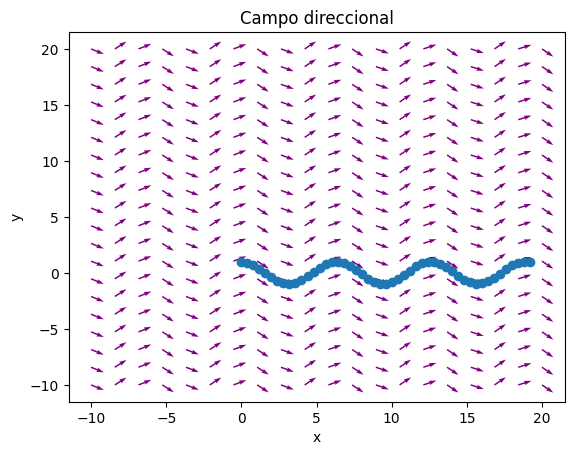

In [ ]:
# Función auxiliar que define el campo vectorial
def F(x, y):
    u = 1
    v = -1*np.sin(x)
    return u, v

def graficar_campo_direcciones(F, xmin, xmax, ymin, ymax, xstep, ystep, unitario=False, graficar_flujo=False, punto_flujo=None):
    # Crear rangos y subdivisiones en los ejes x e y
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    # Generar la rejilla de puntos a graficar
    X, Y = np.meshgrid(x, y)

    # Evaluar la función f en cada punto de la rejilla
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    # Si se desea graficar el campo unitario
    if unitario:
        M = np.hypot(U, V)
        U, V = U / M, V / M

    # Graficar el campo vectorial usando quiver
    plt.quiver(X, Y, U, V, color='purple',angles = 'xy')
    plt.title('Campo direccional')
    plt.xlabel('x')
    plt.ylabel('y')

    # Graficar las líneas de flujo si se especifica
    if graficar_flujo and punto_flujo:
        x_seed, y_seed = punto_flujo
        plt.streamplot(X, Y, U, V, color='blue', start_points=np.array([[x_seed, y_seed]]))
    elif graficar_flujo:
        plt.streamplot(X, Y, U, V, color='blue')

    # Gráfico para el método de Heun
    plt.plot(t_all_heun, u_all_heun, 'o-', label='Método de Heun')

    plt.show()

graficar_campo_direcciones(F, xmin=-10, xmax=20, ymin=-10, ymax=20, xstep=20, ystep=20, unitario=True, graficar_flujo=False)

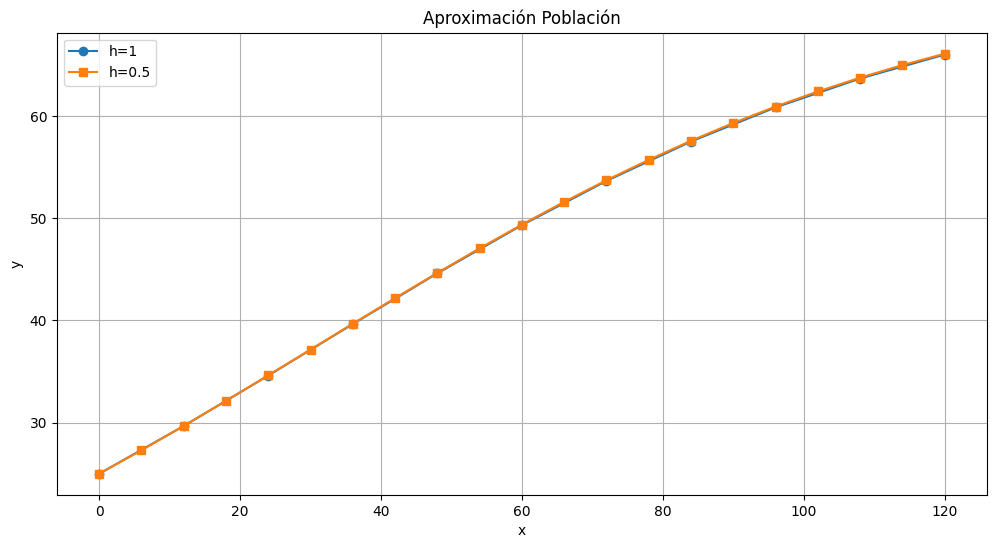


Población límite: 75.0 animales

Porcentaje de la población límite alcanzado con h=0.5 años:
- Después de 5 años: 65.82983108611413%
- Después de 10 años: 88.11625019043817%

Población límite y porcentaje alcanzado con h=1 año:
- Después de 5 años: 65.7541834032637%
- Después de 10 años: 88.00310842624282%



In [ ]:
# Definición de la función para la ecuación diferencial dada
def func(t, P):
    return 0.0225 * P - 0.0003 * P**2

# Método de Heun
def heun(f, u0, t0, t_max, dt):
    u = u0
    t = t0
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt * f(t, u)  # Aproximación de Euler
        u = u + 0.5 * dt * (f(t, u) + f(t + dt, ue))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return u_all, t_all

# Valores iniciales
P0 = 25
t0 = 0
t_max_10_years = 10 * 12  # 10 años en meses
t_max_5_years = 5 * 12  # 5 años en meses

# Solución con tamaño de paso h = 1 año (12 meses)
P_10_years_h1, t_10_years_h1 = heun(func, P0, t0, t_max_10_years, 12)

# Solución con tamaño de paso h = 0.5 años (6 meses)
P_10_years_h05, t_10_years_h05 = heun(func, P0, t0, t_max_10_years, 6)

# Crear gráficos para la ecuación diferencial
plt.figure(figsize=(12, 6))

# Gráfico para el método de Euler
plt.plot(t_10_years_h1, P_10_years_h1, 'o-', label='h=1')

# Gráfico para el método de Heun
plt.plot(t_10_years_h05, P_10_years_h05, 's-', label='h=0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación Población')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar población a 5 años
P_5_years_h1 = P_10_years_h1[t_max_5_years // 12]
P_5_years_h05 = P_10_years_h05[t_max_5_years // 6]

# Calcular la población límite
# Cuando dP/dt = 0 => 0 = 0.0225P - 0.0003P^2
# P(0.0003P - 0.0225) = 0 => P = 0 ó P = 0.0225 / 0.0003

P_limit = 0.0225 / 0.0003

# Porcentajes
percentage_5_years_h1 = (P_5_years_h1 / P_limit) * 100
percentage_10_years_h1 = (P_10_years_h1[-1] / P_limit) * 100

percentage_5_years_h05 = (P_5_years_h05 / P_limit) * 100
percentage_10_years_h05 = (P_10_years_h05[-1] / P_limit) * 100

resultados = f"""
Población límite: {P_limit} animales

Porcentaje de la población límite alcanzado con h=0.5 años:
- Después de 5 años: {percentage_5_years_h05}%
- Después de 10 años: {percentage_10_years_h05}%

Población límite y porcentaje alcanzado con h=1 año:
- Después de 5 años: {percentage_5_years_h1}%
- Después de 10 años: {percentage_10_years_h1}%
"""

# Mostrar los resultados
print(resultados)
